In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from math import sin, cos
from matplotlib.animation import FuncAnimation

In [2]:
def function(mat,x):
    return mat[0] + (mat[0]-mat[12])*x - (mat[0]-mat[11])*x**2 + mat[4]*sin(x+mat[12]) + mat[5]*cos(x+mat[11]) + mat[6]*sin(2*(x+mat[10])) + mat[2]*cos(2*(x+mat[8])) + mat[3]*sin(3*(x+mat[9])) + mat[1]*cos(3*(x+mat[7]))

In [3]:
y_val = np.array([ -1.3, 10.6, 1.7, 13.4, -0.4, -5.2, -3.6, -1, -1.6, -1.6, -2.6, -2.3 , -2.6])
x_val = np.zeros(y_val.shape)

x_val.shape
y_val.shape

(13,)

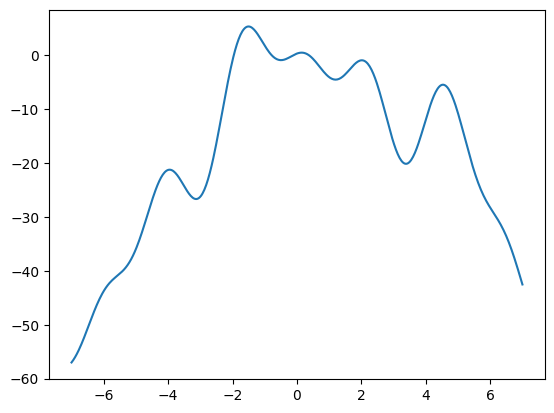

In [4]:
data = pd.read_csv("data.csv")
x = data.X
y = data.FX
plt.plot(x,y)

In [5]:
y_cum = []
for i in range(500):
    y_cum.append(y_val)
y_cum = np.array(y_cum)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(200,activation="leaky_relu"),
    tf.keras.layers.Dense(200,activation="leaky_relu"),
    tf.keras.layers.Dense(100,activation="leaky_relu"),
    tf.keras.layers.Dense(13,activation="leaky_relu"),
    # tf.keras.layers.Softmax()
])

In [7]:
model.compile(
    optimizer = "adam",
    # loss = tf.keras.losses.SparseCategoricalCrossentropy,
    loss = tf.keras.losses.MeanAbsoluteError,
    metrics = ['accuracy','precision']
)

(-59.00407002606446, 7.373284168603076)

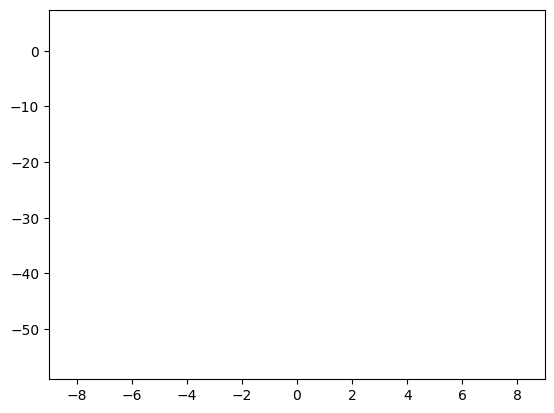

In [8]:
fig, axis = plt.subplots()
animated_plot, = axis.plot([],[])
axis.set_xlim(min(x)-2,max(x)+2)
axis.set_ylim(min(y)-2,max(y)+2)

In [9]:

def updator(frame):
    plt.cla()
    model.fit(x,y_cum,epochs=frame)
    prediction = model.predict(x)
    ls = []
    for i in range(len(y)):
        ls.append((prediction[i]))
    actual = []
    pred = []

    for i in x:
        actual.append(function(y_val, i)) 
        pred.append(function(prediction[1], i)) 
    animated_plot.set_data(x,pred)
    # animated_plot.set_label(f"Iteration {frame}")
    return animated_plot

In [10]:
animate = FuncAnimation(
    fig = fig,
    func=updator,
    frames=20,
    interval=100
)
plt.show()


In [ ]:
animate.save("animftk.mp4")

In [11]:
fthistory = None
fthistory = model.fit(x,y_cum,epochs=50)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0078 - loss: 3.5943 - precision: 1.0000    
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5394 - loss: 2.7101 - precision: 1.0000 
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7451 - loss: 1.7055 - precision: 1.0000 
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.3515 - precision: 1.0000 
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.2049 - precision: 1.0000 
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.9195 - precision: 1.0000 
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.6158 - precision: 1.0000 
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1911 - precision: 1.0000 
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0944 - precision: 1.0000 
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

Text(0.5, 1.0, 'Loss Curve B')

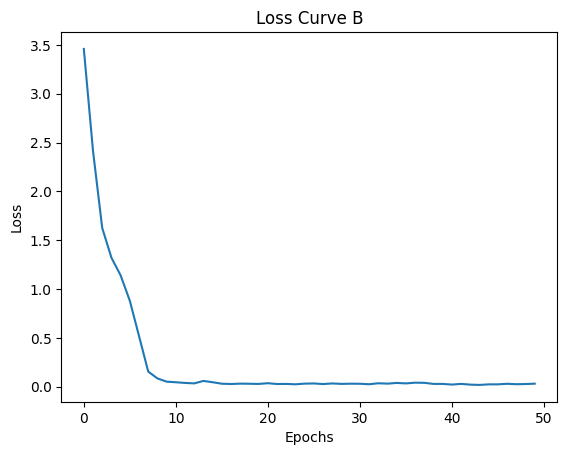

In [12]:
plt.plot(fthistory.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve B')

In [20]:
with open("analysis.txt",'a') as f:
    f.write(f"{fthistory.history['loss']}\n")

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200)            │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 13)             │         1,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 186,041 (726.73 KB)

 Trainable params: 62,013 (242.24 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 124,028 (484.49 KB)

In [84]:
def modelit(iters):
    plt.cla()
    model.fit(x,y_cum, epochs = iters)
    prediction = model.predict(x)
    ls = []
    for i in range(len(y)):
        ls.append((prediction[i]))
    actual = []
    pred = []

    for i in x:
        actual.append(function(y_val, i)) 
        pred.append(function(prediction[1], i)) 
    plt.plot(x,actual)
    plt.plot(x,pred)
    
    plt.title(f"Iteration: {iters}")
    plt.savefig(f'animftk/conv{iters}.png')
for i in range(0):
    modelit(i)

In [ ]:
model.fit(x,y_cum,epochs = 0)

In [ ]:
index = 21
print(y_cum[index])
prediction = model.predict(x)
ls = []
for i in range(len(y)):
    ls.append((prediction[i]))
print(ls[index])

In [ ]:
print(prediction[1])
print(y_val)

actual = []
pred = []

for i in x:
    actual.append(function(y_val, i)) 
    pred.append(function(prediction[1], i)) 

In [ ]:
plt.plot(x,actual)
plt.plot(x,pred)